# **Capstone Project** - Play Store App Review Analysis

# **Project by** - Saikumar ES 

### Github - 

# **Problem Statement:**
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
Explore and analyze the data to discover key factors responsible for app engagement and success.

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plot


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter data/Play Store Data.csv')


### Dataset First View

In [5]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [6]:
data.shape

(10841, 13)

There are 10841 rows and 13 columns

### Dataset Information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Out of 13 columns 8 columns (App,category,reviews,size,installs,price,genres,lastupdated ) has no null elements in their rows. Content rating has 1 null. Rating has 974 nulls. Type has 1 null element. current version 8 nulls and android version has 3 nulls

###Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

483

We have 483 duplicates in total so we need to treat this duplicates and we need to remove those duplicates. Once we complete with the NA treatment we will remove these

Data contains 483 rows has duplicated data

#### Missing Values/Null Values

In [9]:
# Visualizing the missing values
print(data.isnull().values.any())
print(data.isnull().values.sum())

True
1487


This clearly shows that there are NULL present in the data which is indicated by true when we apply the isnull.any() funtion in the data. We could able to see 1487 data has null

#### Understanding Your Variables

In [10]:
# Dataset Columns
data_columns = data.columns
data_columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We could able to see some of the columns are not in the correct datatype like price needs to be in float or int but its object. So we need to change it into the correct datatype.

### **Cleaning of data**


### Breakup of the null data with percentage

In [12]:
#describing the null data category wise:

def playstoreinfo():
  data_describe=pd.DataFrame(index=data.columns)
  data_describe["datatype"]=data.dtypes
  data_describe["not null values"]=data.count()
  data_describe["null value"]=data.isnull().sum()
  data_describe["% of the null value"]=round(data.isnull().mean()*100,5)
  data_describe["unique count"]=data.nunique()
  return data_describe
playstoreinfo()

,datatype,not null values,null value,% of the null value,unique count
App,object,10841,0,0.00000,9660
Category,object,10841,0,0.00000,34
Rating,float64,9367,1474,13.59653,40
Reviews,object,10841,0,0.00000,6002
Size,object,10841,0,0.00000,462
Installs,object,10841,0,0.00000,22
Type,object,10840,1,0.00922,3
Price,object,10841,0,0.00000,93
Content Rating,object,10840,1,0.00922,6
Genres,object,10841,0,0.00000,120


Out of 1487 NULL values in the dataset we can see the major contribution from the ratings, which contributes 1474 of NULL values which is nearly 99% of NULL comes from this category. But when it is viewed from the overall view it contributes nearly 13.59% of NULL values. Rest of the categories like  type,content rating, current version and android version is less than 1 percent. These category doesnt impact a lot when it is removed from the analysis.

The data which are going to be remove/change are:
*  Android verion - 0.02 %  is  null which is almost 3 rows. It can be deleted
*  current version - 0.07% is null which is almost 8 rows.  It can be deleted
*  Type - Here we have the choice of deleting the row or changing the missing data. Since we have 2 things of either the type is paid or free So we can go with the assumption that it is free. So here we are going to consider the Null as free. The percentage it contributed - 0.009% and it has 1 value.
*  Content rating - 0.0092% is Null which is almost 1 row. So it can be deleted.
*  Rating - 1474 rows have Null value. which is 13.59% of the data. Removing the data will impact in the overall analysis. So we can have the mean value of the rating to the Null values.

### Removal of the NA's 

In [13]:
# creating a duplicate dataset
data_1 = data.copy()
data_1.shape

(10841, 13)

In [14]:
data_1[data_1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column from the duplicate dataset.
data_1 = data_1[data_1['Android Ver'].notna()]
data_1.shape


(10838, 13)

So We have removed the Null data successfully. Now the shape of the data is 10838 rows and 13 columns

In [16]:
data_1[data_1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [17]:
# dropping rows corresponding to the to the NaN values in the 'Current Ver' column from the duplicate dataset.
data_1 = data_1[data_1['Current Ver'].notna()]
data_1.shape

(10830, 13)

So We have removed the Null data successfully. Now the shape of the data is 10830 rows and 13 columns

In [18]:
data_1[data_1['Type'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [19]:
# changing rows corresponding to the to the NaN values in the 'Type' column from the duplicate dataset to free category.
data_1.loc[9148,'Type']='Free'
data_1.shape

(10830, 13)

In [20]:
data_1.iloc[9148]

App                      POGO Games
Category                     FAMILY
Rating                          3.8
Reviews                       32600
Size                            26M
Installs                 1,000,000+
Type                           Free
Price                             0
Content Rating             Everyone
Genres                       Casual
Last Updated      February 22, 2017
Current Ver                  1.4.10
Android Ver              4.1 and up
Name: 9157, dtype: object

Here we have successfully replaced the data of NA to free.

In [21]:
data_1[data_1['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [22]:
#checking whether any app has a rating of less than 1 and greater than 5
data_1[(data_1['Rating'] <1) | (data_1['Rating']>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


So there is no such conditions exist.

In [23]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = round(data_1[~data_1['Rating'].isnull()]['Rating'].mean(),1)

median_rating = data_1[~data_1['Rating'].isnull()]['Rating'].median()

[mean_rating , median_rating]

[4.2, 4.3]

So we have got the mean and median(4.2,4.3). Choosing which one will be good for the replacemnet. Since there is no much variation in the mean and median we can go with anything. Here we are choosing Median.

In [24]:
# Replacing the NaN values in the 'Rating' colunm with its median value
data_1['Rating'].fillna(value=median_rating,inplace=True)

In [25]:
data_1.iloc[129]

App               Recipes and tips for losing weight
Category                                      BEAUTY
Rating                                           4.3
Reviews                                           35
Size                                            3.1M
Installs                                     10,000+
Type                                            Free
Price                                              0
Content Rating                          Everyone 10+
Genres                                        Beauty
Last Updated                       December 11, 2017
Current Ver                                      2.0
Android Ver                               3.0 and up
Name: 130, dtype: object

Here a sample row is checked whether the data has been changed or not. So we can able to see the data has been changed.

### Removal Of Duplicates

In [26]:
print(data_1['App'].value_counts())
print(data_1.shape)

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64
(10830, 13)


So we could able to see the number of times a particular app has repeated. So we need to remove the duplicated rows.

In [27]:
data_1.drop_duplicates(subset = 'App', inplace = True)
data_1.shape

(9649, 13)

So we have removed the duplicated data.

In [28]:
data_1[data_1['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


So earlier the ROBLOX app has repeated 9 times now the duplicates are removed and we could not able to see the duplicates. 

###   Change of Data types

In [29]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9649 non-null   object 
 1   Category        9649 non-null   object 
 2   Rating          9649 non-null   float64
 3   Reviews         9649 non-null   object 
 4   Size            9649 non-null   object 
 5   Installs        9649 non-null   object 
 6   Type            9649 non-null   object 
 7   Price           9649 non-null   object 
 8   Content Rating  9649 non-null   object 
 9   Genres          9649 non-null   object 
 10  Last Updated    9649 non-null   object 
 11  Current Ver     9649 non-null   object 
 12  Android Ver     9649 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


In [30]:
#changing the data type of last update
data_1['Last Updated'] = pd.to_datetime(data_1['Last Updated'])

In [31]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   object        
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.0+ MB


We could able to see eariler the last update was in object now it has been changed into datetime format


In [32]:
#changing the format of price
data_1['Price'].value_counts()


0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

We could able to see the dollar sign infront of the price. This might be the reason for the object data type. Intially lets remove the dollar sign.

In [33]:
def convert_dollar(val):

  if '$' in val:
    return(val[1:])
  else:
    return(val)

In [34]:
data_1['Price']=data_1['Price'].apply(lambda x: convert_dollar(x))
data_1['Price'] = pd.to_numeric(data_1['Price'])

In [35]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


So we have changed the data type of price into float from object

In [36]:
#changing the format of installs

data_1['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

In [37]:
def removal_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new_1 = int(val[:-1])
    return new_1
  else:
    new_2 = int(val)
    return new_2

In [38]:
data_1['Installs']=data_1['Installs'].apply(lambda x: removal_plus(x))
data_1['Installs'] = pd.to_numeric(data_1['Installs'])

In [39]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


In the installs we have removed the plus and comma and converted the data type to int

In [40]:
# converting the size of the app
data_1['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

So we have both MB and KB type data. So we can convert into a particular type  of data either MB or KB. 1 MB = 1024 KB. Also we need to remove the albhabets like MB or KB in the data. We also have a criteria Varies with device. This values needs to be replaced with the mean or the median

In [41]:
def convert_kb_to_mb(val):

  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)     
    else:
      return val
  except:
    return val

In [42]:
data_1['Size']=data_1['Size'].apply(lambda x: convert_kb_to_mb(x))


In [185]:
data_1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [43]:
data_1['Size'] = data_1['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
data_1['Size'] = data_1['Size'].apply(lambda x: float(x))

Checking graphically what type of value can be inserted whether mean or median

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


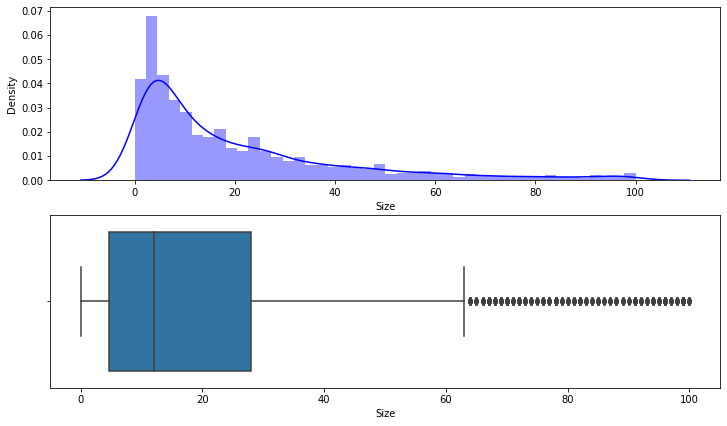

In [44]:
#graphical check

fig, ax = plt.subplots(2,1, figsize=(12,7))
sns.distplot(data_1[data_1['Size'] != 'Varies with device']['Size'], color='b', ax=ax[0])
sns.boxplot(x='Size',data=data_1, ax=ax[1])

Since it is a skewed data and inserting the data for the varies from device might changes the nature of the data so we can't replace the data with NAN itself. 

In [45]:
# converting the reviews of the app
data_1['Reviews'].value_counts()

0         592
1         271
2         213
3         170
4         137
         ... 
157506      1
351254      1
49211       1
88860       1
398307      1
Name: Reviews, Length: 5328, dtype: int64

In [46]:
data_1['Reviews'] = pd.to_numeric(data_1['Reviews'])

In [47]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            8422 non-null   float64       
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.0+ MB


Thus we have converted the data of number of reviews to numberic

### **Exploring User_review dataframe**

### Dataset Loading

In [48]:
data_reviews = pd.read_csv('/content/drive/MyDrive/Almabetter data/User Reviews.csv')

### Dataset First View

In [49]:
data_reviews.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### Dataset Rows & Columns count

In [50]:
data_reviews.shape

(64295, 5)

There are 64295 rows and 5 columns

### Dataset Information

In [51]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [53]:
#getting the columns of the dataset
data_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [54]:
#getting the percentage of null in each column

def reviews_info():
  temp1=pd.DataFrame(index=data_reviews.columns)
  temp1["datatype"]=data_reviews.dtypes
  temp1["not null values"]=data_reviews.count()
  temp1["null value"]=data_reviews.isnull().sum()
  temp1["% of the null value"]=data_reviews.isnull().mean().round(4)*100
  temp1["unique count"]=data_reviews.nunique()
  return temp1
reviews_info()

,datatype,not null values,null value,% of the null value,unique count
App,object,64295,0,0.00,1074
Translated_Review,object,37427,26868,41.79,27994
Sentiment,object,37432,26863,41.78,3
Sentiment_Polarity,float64,37432,26863,41.78,5410
Sentiment_Subjectivity,float64,37432,26863,41.78,4474


We could able to see more than 40% of the data are Null which has 26868 in translated_review and 26863 Null's in sentiment,sentiment_polarity,_sentiment_subjective.

We can say that the apps which do not have a reviews for majority of the cases.Since the data is not available we are removing the Null values from the dataset

In [55]:
data_reviews = data_reviews.dropna()

In [56]:
data_reviews.shape

(37427, 5)

Now we have removed all the Null values and the new shape of the dataset is viewd 37427 rows and 5 columns

In [57]:
# Inspecting the sentiment column
data_reviews['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

We could able to see the sentiment data which has been collected looks real.

### **Data Visualization** 

### Correlation

Text(0.5, 1.0, 'Corelation Heatmap for Playstore Data')

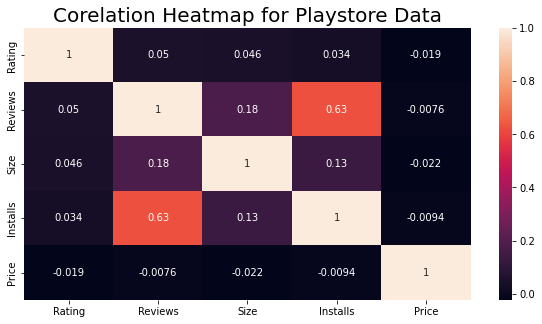

In [61]:
#getting the correlation between the variables

plt.figure(figsize = (10,5))
sns.heatmap(data_1.corr(), annot= True)
plt.title('Corelation Heatmap for Playstore Data', size=20)

We could able to see the correlation between the variables. We could able to see a high positive correlation between Installs and Reviews with 0.63 positive correlations where as we could able to see a high negative correlation between price and the rating.

### Correlation between two datasets

In [62]:
merged_data = pd.merge(data_1, data_reviews, on='App', how = "inner")

In [63]:
def merged_data_info():
  temp = pd.DataFrame(index=merged_data.columns)
  temp['data_type'] = merged_data.dtypes
  temp["count of non null values"] = merged_data.count()
  temp['NaN values'] = merged_data.isnull().sum()
  temp['% NaN values'] =merged_data.isnull().mean()
  temp['unique_count'] = merged_data.nunique() 
  return temp
merged_data_info()

,data_type,count of non null values,NaN values,% NaN values,unique_count
App,object,35929,0,0.000000,816
Category,object,35929,0,0.000000,33
Rating,float64,35929,0,0.000000,22
Reviews,int64,35929,0,0.000000,807
Size,float64,24069,11860,0.330095,166
Installs,int64,35929,0,0.000000,12
Type,object,35929,0,0.000000,2
Price,float64,35929,0,0.000000,9
Content Rating,object,35929,0,0.000000,5
Genres,object,35929,0,0.000000,67


Since the data in the size is not removed and still has Null it is reflected in the data

Text(0.5, 1.0, 'Corelation Heatmap for Merged data of  Playstore')

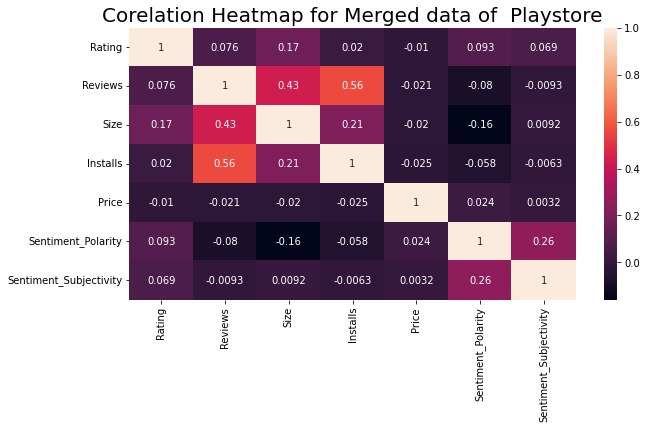

In [66]:
#getting the correlation between the two dataset variables

plt.figure(figsize = (10,5))
sns.heatmap(merged_data.corr(), annot= True)
plt.title('Corelation Heatmap for Merged data of  Playstore', size=20)

Still we could able to see a high positive correlation between the installs with 0.56 and reviews and negative correlation between size and sentiment_polarity with -0.16

### **Ratio of Paid and free apps**

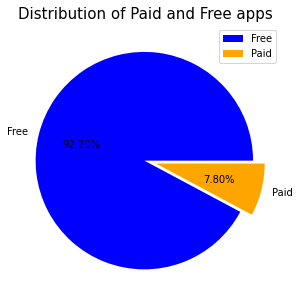

In [73]:
data = data_1['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,5))
colors = ["blue","orange"]
explode=(0.01,0.1)
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',explode=explode,textprops={'fontsize': 10})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

From this we could able to see in the play store 92% of the users use the free Apps where as 7.80% use the paid apps

### Ratio of content rating

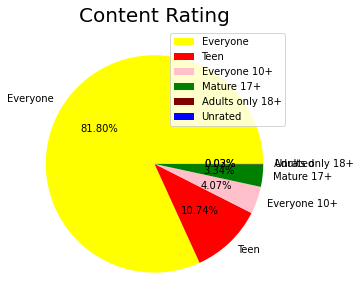

In [77]:
data = data_1['Content Rating'].value_counts()
labels = ['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+','Adults only 18+', 'Unrated']

#create pie chart
plt.figure(figsize=(10,5))

colors = ['yellow', 'red', 'pink', 'green', 'maroon', 'blue']
plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%',textprops={'fontsize': 10})
plt.title('Content Rating',size=20,loc='center')
plt.legend()

A majority of the apps (82%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it. Where as the adults 18+ uses the least

### Top 10 category of the apps installs

In [92]:
category_data = data_1.groupby('Category')['App'].count().sort_values(ascending = False)
category_data

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

We can see clearly the family category apps are installed at a high number 

In [101]:
y = data_1['Category'].value_counts()
x = data_1['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

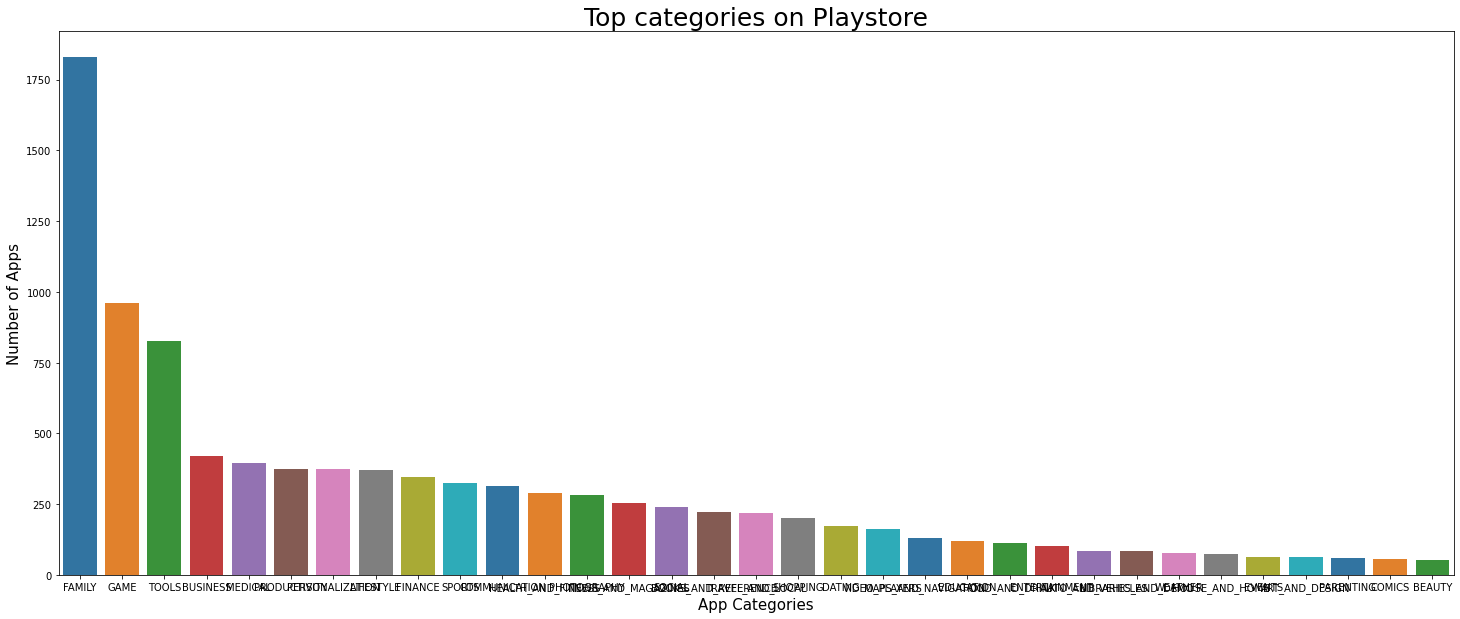

In [109]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(25,10))
plt.ylabel('Number of Apps', size=15)
plt.xlabel('App Categories', size=15)
graph = sns.barplot(y = y_list, x = x_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels());

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under family & game category and least are of events & beauty Category.

### Category of  Apps have most number of installs

Text(0.5, 1.0, 'Total app installs in each category')

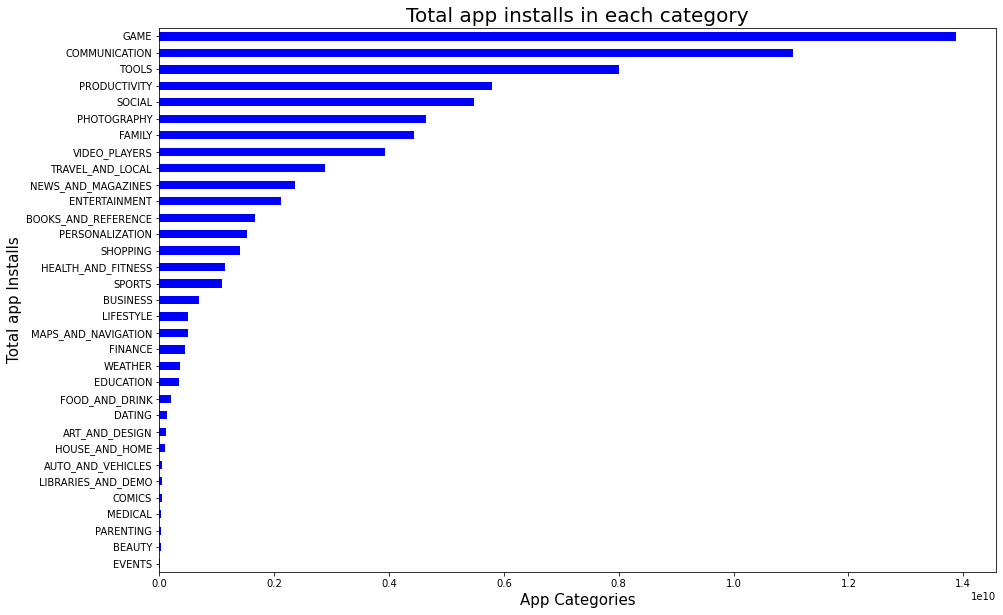

In [111]:
# total app installs in each category of the play store

a = data_1.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'b', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

### Average rating of the apps

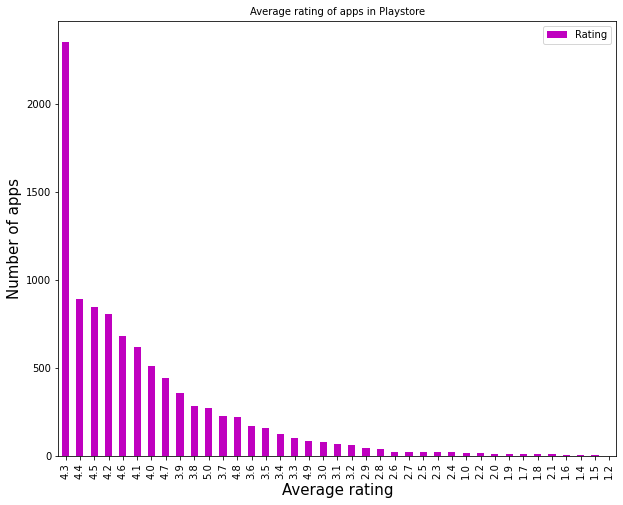

In [114]:
# Average app ratings

data_1['Rating'].value_counts().plot.bar(figsize=(10,8), color = 'm' )
plt.xlabel('Average rating',fontsize = 15 )
plt.ylabel('Number of apps', fontsize = 15)
plt.title('Average rating of apps in Playstore', fontsize = 10)
plt.legend()

We could able to see most of the apps have a good average rating of 4.3 which is shown in the graph. Whereas some of the apps has 1.5 as min average rating

On further we can classify the apps based on the ratings given and visualize. The categories are as below:

* 4-5: Top rated
* 3-4: Above average
* 2-3: Average
* 1-2: Below average

In [115]:
# Defining a function grouped_rating to group the ratings as mentioned above
def Rating_app(val):
  if val>=4:
    return 'Top rated'
  elif val>3 and val<4:
    return 'Above Average'
  elif val>2 and val<3:
    return 'Average'
  else:
    return 'Below Average'

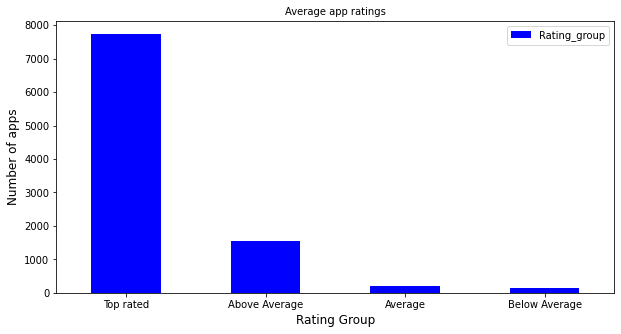

In [121]:
# Applying grouped_rating function
data_1['Rating_group']=data_1['Rating'].apply(lambda x: Rating_app(x))
# Average app ratings 
data_1['Rating_group'].value_counts().plot.bar(figsize=(10,5), color = 'blue')
plt.xlabel('Rating Group', fontsize = 12)
plt.ylabel('Number of apps', fontsize = 12)
plt.title('Average app ratings', fontsize = 10)
plt.xticks(rotation=0)
plt.legend()

### Top 10 installed apps in any category

In [126]:
def findtop10incategory(str):
    str = str.upper()
    top10 = data_1[data_1['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    plt.figure(figsize=(10,6), dpi=100)
    plt.title('Top 10 Installed Apps',size = 10)  
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs, palette= "icefire")
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

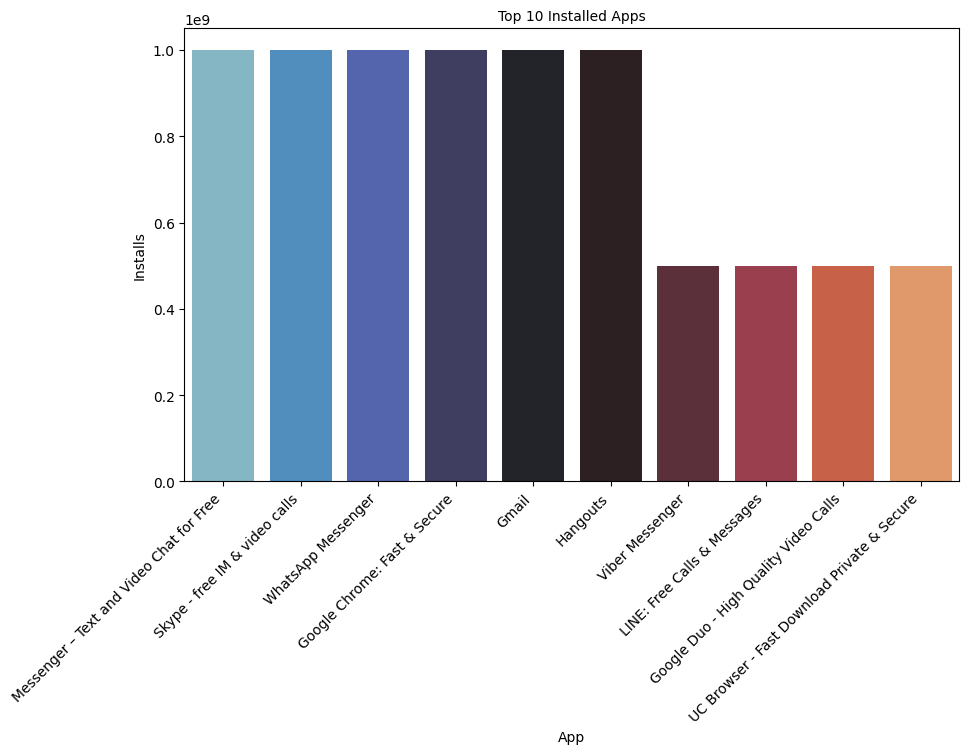

In [128]:
findtop10incategory('COMMUNICATION')

This piece of Visualisation helps in getting top 10 apps in each categories. Here as a example we have used the communication category

In [137]:
 # Creating a df for only free apps
 free_data = data_1[data_1['Type'] == 'Free']

top_free_data = free_data[free_data['Installs'] == free_data['Installs'].max()]
top10free_apps=top_free_data.nlargest(10, 'Installs', keep='first')
top10free_apps.head(10)

top_free_data['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

We could able see Youtube is the most free apps used.

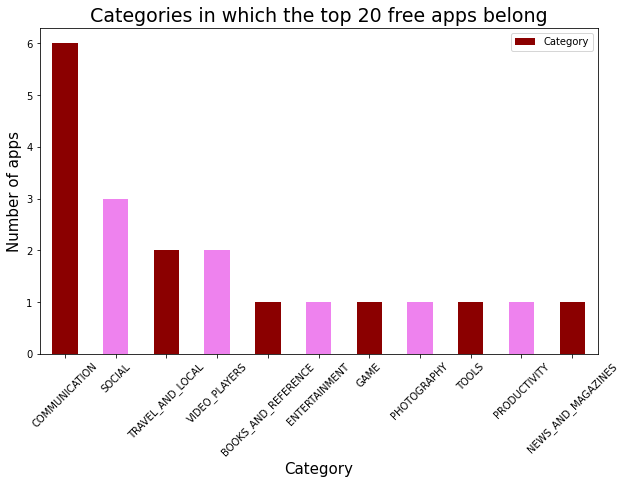

In [135]:
# Categories in which the top 20 free apps belong to
top_free_data['Category'].value_counts().plot.bar(figsize=(10,6), color= ('darkred','violet'))
plt.xlabel('Category', size=15)
plt.ylabel('Number of apps', size=15)
plt.title('Categories in which the top 20 free apps belong', size=19)
plt.xticks(rotation=45)
plt.legend()

Communication category has the highest free apps

### Top paid apps

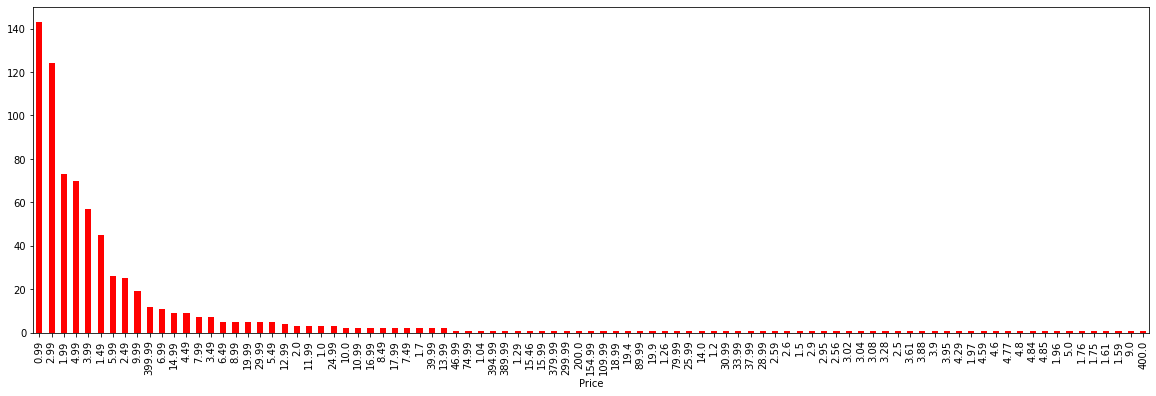

In [142]:
# Number of apps that can be installed at a particular price 

paid_data=data_1[data_1['Type']=='Paid']

paid_data.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,6), color = 'red')

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.

### Getting the revenue earned from the apps

In [146]:
paid_data['Revenue'] = paid_data['Installs']*paid_data['Price']
paid_data.head()

max_value = paid_data[paid_data['Revenue'] == paid_data['Revenue'].max()]
max_value

<ipython-input-146-147852d2b078>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_data['Revenue'] = paid_data['Installs']*paid_data['Price']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_group,Revenue
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,Top rated,69900000.0


In [147]:
# Top 10 paid apps in the play store
top10paid_apps=paid_data.nlargest(10, 'Revenue', keep='first')
top10paid_apps['App']

2241                        Minecraft
5351                        I am rich
5356                I Am Rich Premium
4034                    Hitman Sniper
7417    Grand Theft Auto: San Andreas
2883              Facetune - For Free
5578          Sleep as Android Unlock
8804              DraStic DS Emulator
4367         I'm Rich - Trump Edition
4362                       💎 I'm rich
Name: App, dtype: object

I am rich is the 1st top paid apps used in the play store.

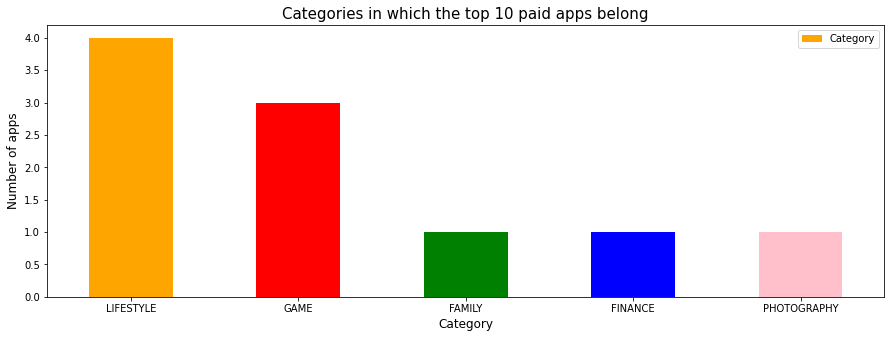

In [149]:
# Categories in which the top 10 paid apps belong to
top10paid_apps['Category'].value_counts().plot.bar(figsize=(15,5), color= ["orange", "red", "green", "blue", "pink"])
plt.xlabel('Category',size=12)
plt.ylabel('Number of apps',size=12)
plt.title('Categories in which the top 10 paid apps belong', size=15)
plt.xticks(rotation=0)
plt.legend()

Lifestyle is the category with most paid apps

### Classification of App size

In [150]:
# Function to group the apps based on its size in MB

def size_apps(var):
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

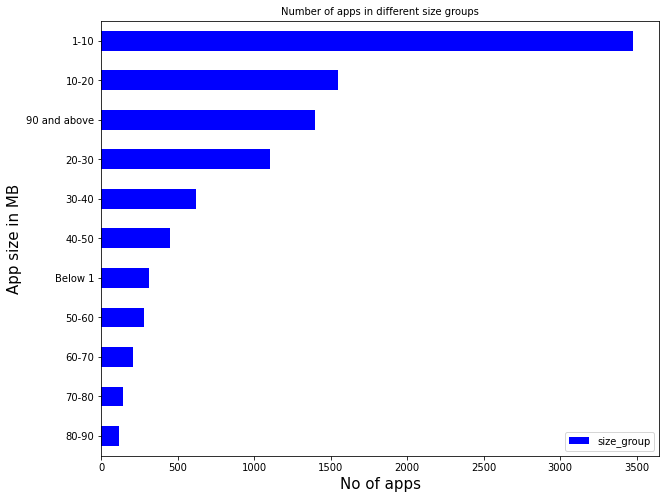

In [155]:
data_1['size_group']=data_1['Size'].apply(lambda x : size_apps(x))
# no of apps belonging to each size group
data_1['size_group'].value_counts().plot.barh(figsize=(10,8),color='b').invert_yaxis()
plt.title("Number of apps in different size groups", size=10)
plt.ylabel('App size in MB', size=15)
plt.xlabel('No of apps', size=15)
plt.legend()

We could able to see the apps which exist in app store is between 1 - 10 MB and very few apps are between 80 - 90 MB. Even 90 and above MB is in 3rd position

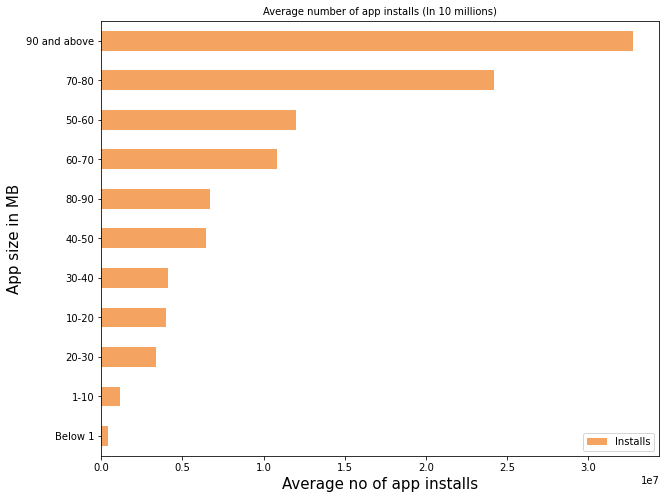

In [157]:
# average number of app installs in each category
data_1.groupby('size_group')['Installs'].mean().sort_values(ascending= False).plot.barh(figsize=(10,8),color='sandybrown').invert_yaxis()
plt.title("Average number of app installs (In 10 millions)", size=10)
plt.ylabel('App size in MB', size=15)
plt.xlabel('Average no of app installs',  size=15)
plt.legend()

We could able to see the users have downloaded 90 and above mb in a higher downloads

### Percentage of Review Sentiments

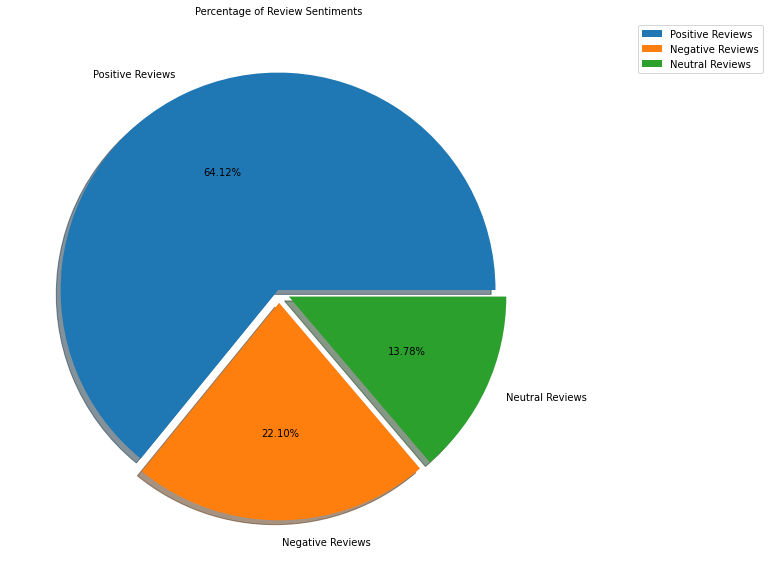

In [164]:
counts = list(data_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plot.rcParams['font.size'] = 10
plot.rcParams['figure.figsize'] = (10, 10)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=10)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

### Apps with most number of positive reviews

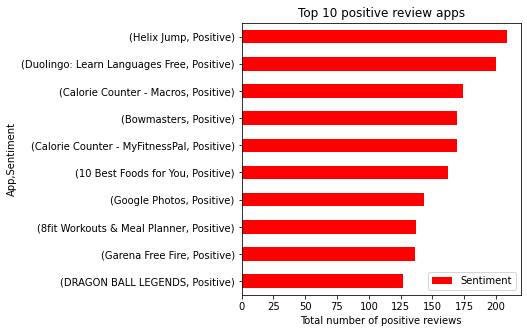

In [170]:
positive_reviews=data_reviews[data_reviews['Sentiment']=='Positive']

positive_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(5,5),color='red').invert_yaxis()
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

Helix Jump has the most number of positive reviews. 

### Apps with most number of negative reviews

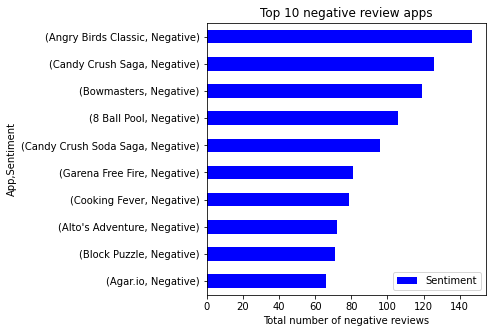

In [172]:
negative_reviews=data_reviews[data_reviews['Sentiment']=='Negative']

negative_reviews.groupby('App')['Sentiment'].value_counts().nlargest(10).plot.barh(figsize=(5,5),color='blue').invert_yaxis()
plt.title("Top 10 negative review apps")
plt.xlabel('Total number of negative reviews')
plt.legend()

### Paid and Free app updated over the Month

In [176]:
paid_data["Update month"] = paid_data["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64') 
free_data["Update month"] = free_data["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')


<ipython-input-176-a5718c1bc148>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_data["Update month"] = paid_data["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')
<ipython-input-176-a5718c1bc148>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_data["Update month"] = free_data["Last Updated"].apply(lambda x: x.strftime('%m')).astype('int64')


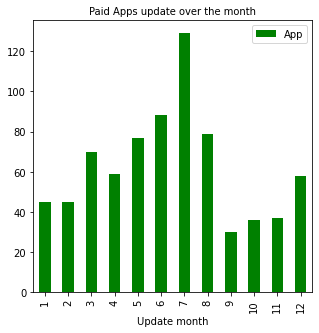

In [181]:
#update month vs number of updates

paid_data.groupby("Update month")["App"].count().plot.bar(figsize=(5,5), color= "green")
plt.title("Paid Apps update over the month", size=10)
plt.legend()

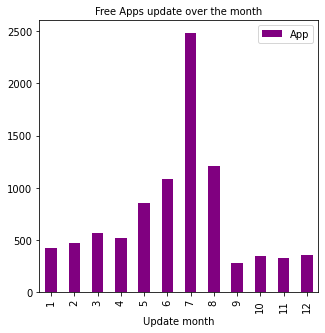

In [180]:
free_data.groupby("Update month")["App"].count().plot.bar(figsize=(5,5), color='purple')
plt.title("Free Apps update over the month", size=10)
plt.legend()

In Both the cases July month has a higher update rate.

### **Conclusion**

* Percentage of free apps is almost 92%
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* The median size of all apps in the play store is 12 MB.
* Overall sentiment count of merged dataset in which Positive sentiment count is 64%, Negative 22% and Neutral 13%.
* Most of the apps have rating in between 4 and 5.
* Most numbers of apps are rated at 4.3.
* Majority of the apps come into these three categories, Family, Game, and Tools.
* The category ‘Family’ has the highest number of paid apps.
* Free apps are installed more than paid apps.
* The app “I’m Rich — Trump Edition” from the category ‘Lifestyle’ is the most costly app priced at $400.
* Number of installs is positively correlated with reviews with correlation 0.64. Sentiment Analysis